# Classification: Predicting Default

## Problem and Context

It is critical to be able to identify the potential loan defaults when working in the financial domain. Given a set of features about a person, the goal of this project is to predict if the person will default on a loan or not.

## Data Information

The data we will use has the following features:

- **Default**: Yes/No, categorical dependent variable suggesting the state of default
- **Student**: Yes/No, categorical independent variable depicting if the applicant is a student or not.
- **balance**: account balance of the applicant
- **Income**: Income of the applicant

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Remove the scientific notation and display numbers with 2 significant figures instead
pd.options.display.float_format = '{:,.2f}'.format        

# Set the default background style of plots
sns.set_style(style='darkgrid')

In [4]:
# Import library necessary for file uploads
from google.colab import files
# Request the upload of the data file
uploaded = files.upload()

# Read the data file into a dataframe
df = pd.read_csv('Default.csv')

Saving Default.csv to Default.csv


In [5]:
# Print the first 5 entries of the dataframe
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.53,"44,361.63"
1,2,No,Yes,817.18,"12,106.13"
2,3,No,No,"1,073.55","31,767.14"
3,4,No,No,529.25,"35,704.49"
4,5,No,No,785.66,"38,463.50"


In [6]:
# Drop the column Unnamed:0 as it is just the index
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.head()

,default,student,balance,income
0,No,No,729.53,"44,361.63"
1,No,Yes,817.18,"12,106.13"
2,No,No,"1,073.55","31,767.14"
3,No,No,529.25,"35,704.49"
4,No,No,785.66,"38,463.50"


In [7]:
# Define a dictionary to convert the Yes/No entries into numerical values
encoding_dict = {'Yes': 1, 'No': 0}

In [8]:
# Encode the Yes/No features
df['default'] = df['default'].map(encoding_dict)
df['student'] = df['student'].map(encoding_dict)

In [9]:
df.head()

,default,student,balance,income
0,0,0,729.53,"44,361.63"
1,0,1,817.18,"12,106.13"
2,0,0,"1,073.55","31,767.14"
3,0,0,529.25,"35,704.49"
4,0,0,785.66,"38,463.50"


Let's observe the percentage of people in the data set have defaulted on a loan.

In [10]:
df.describe()
df['default'].value_counts(normalize = True)

0   0.97
1   0.03
Name: default, dtype: float64

Only about **3%** of borrowers in the data set have defaulted on a loan. Let's look into the info on the dataframe.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


**Observations:**
- There do not seem to be any missing values so we can jump right into the modeling.

# Linear Discriminant Analysis

In [12]:
# Import the sklearn LDA and QDA libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


Let's start by using individual features. Look at just the **balance** feature first.

In [14]:
# Reduce the data frame into each of the given features
balance = df.balance.values.reshape(len(df['balance']), 1)
default = df.default.values.reshape(len(df['default']), 1)
student = df.student.values.reshape(len(df['student']), 1)
income = df.income.values.reshape(len(df['income']), 1)
features = ['balance', 'student', 'income']

# Fit an LDA model using only the balance feature
lda = LinearDiscriminantAnalysis()
lda.fit(balance, df['default'])
lda_error_rate = (1 - lda.score(balance, default))*100

# Fit a QDA model using only the balance feature
qda = QuadraticDiscriminantAnalysis()
qda.fit(balance, df['default'])
qda_error_rate = (1 - qda.score(balance, default))*100

print("LDA error rate while using only balance as a feature is {}% ".format(np.round(lda_error_rate,2)))
print("QDA error rate while using only balance as a feature is {}%".format(np.round(qda_error_rate,2)))

LDA error rate while using only balance as a feature is 2.81% 
QDA error rate while using only balance as a feature is 2.74%


Now let's observe what happens when we use all of the features.

In [15]:
# Fit the LDA and QDA models using all features
lda.fit(df[features], df['default'])
qda.fit(df[features], df['default'])

new_lda_error_rate = (1 - lda.score(df[features], df['default']))*100
new_qda_error_rate = (1 - qda.score(df[features], df['default']))*100

print("LDA error rate using all the features is {}% ".format(np.round(new_lda_error_rate,2)))
print("QDA error rate using all the features is {}%".format(np.round(new_qda_error_rate,2)))

LDA error rate using all the features is 2.76% 
QDA error rate using all the features is 2.7%


**Observations:**
- We can see that by using all of the features to predict default, the error rate has reduced slightly.

## Logistic Regression

Now let's explore Logistic regression models.  We will start again by fitting the model while only using the balance feature.

In [16]:
# Import the logistic regression library
from sklearn.linear_model import LogisticRegression

In [17]:
# Initialize a logistic regression model and fit the model using balance as the only feature.
lr = LogisticRegression(penalty='none', max_iter=100)
lr.fit(balance, df['default'])
lr_error_rate = (1 - lr.score(balance, df['default']))*100

print("Logistic Regression error rate using balance feature is {}% ".format(np.round(lr_error_rate,2)))

Logistic Regression error rate using balance feature is 2.75% 


In [18]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

Now let's fit the logistic regression model using all features.  We will also experiment with Lasso regularization.

In [19]:
# Initialize and fit the logistic model using all features
lrm = LogisticRegression(penalty='none')
lrm.fit(df[features], df['default'])
lr_error_rate = (1 - lrm.score(df[features], df['default']))*100

# Initialize and fit the logistic model using lasso regularization
lrm_r = LogisticRegression(penalty='l1', solver = 'liblinear')
lrm_r.fit(df[features], df['default'])
lrm_r_error_rate = (1 - lrm_r.score(df[features], df['default']))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr_error_rate,2)))
print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r_error_rate,2)))

Logistic Regression error rate using all the features is 3.28% 
Logistic Regression error rate using absolute value (Lasso) regularization is 2.66% 


**Observations:**
- We calculated the error rates for LDA, QDA and Logistic Regression.
- The hyperparameter 'multi_class' handles the multiclass classification.

## K-Nearest Neighbors (kNN)

To evaluate the model and to evaluate how well it performs on unseen data, we can take a validation set and check the performance of the model as we have seen in other projects. Now let's move to kNN, where we can evaluate the performance against the validation set.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import library used to scale features
from sklearn.preprocessing import StandardScaler
# Initialize our scaler
ss = StandardScaler()

**NOTE**: The following code might take few minutes to run depending on the system's configuration

We will select the best value of **k** for which the error rate is the least in the validation data.

In [24]:
# Loop over a few values of the k to determine the best k 

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()

# Loop over different values of k to determine the best value of k
for k in range(1,16):
    train_error = []
    test_error = []
    lista = []
    # Obtain the knn classifier for the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    #print(k)
    for i in range(100):
        # Obtain the training and testing data
        x_train, x_test, y_train, y_test = train_test_split(df[features], df['default'], test_size = 0.20)
        # Scale the training data using fit and transform
        x_train = ss.fit_transform(x_train)
        # Scale the testing data using transform
        x_test = ss.transform(x_test)
        # Fit the knn classifier to the training data
        knn.fit(x_train, y_train)
        # Obtain the training and testing errors and append them to the appropriate lists
        train_error.append(1 - knn.score(x_train, y_train)) 
        test_error.append(1 - knn.score(x_test, y_test))
    # Obtain the average error across the training and testing data lists
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    # Store these values into a list
    knn_many_split[k] = lista
    #print(knn_many_split[k])

# Print the list created
knn_many_split

{1: [0.0, 0.04226999999999999],
 2: [0.021640000000000013, 0.0337],
 3: [0.022281250000000016, 0.03305500000000001],
 4: [0.02481374999999998, 0.030539999999999998],
 5: [0.024949999999999993, 0.030459999999999984],
 6: [0.025494999999999986, 0.028740000000000005],
 7: [0.024998750000000007, 0.028679999999999987],
 8: [0.02561750000000001, 0.028385000000000014],
 9: [0.025523749999999987, 0.028575000000000007],
 10: [0.025996250000000005, 0.02825499999999998],
 11: [0.026050000000000014, 0.02734],
 12: [0.026378750000000003, 0.027764999999999995],
 13: [0.026016249999999998, 0.027909999999999994],
 14: [0.026497500000000018, 0.027960000000000002],
 15: [0.026241250000000004, 0.027694999999999994]}

In [25]:
# Extract k, the training error, and the testing error into lists for easy plotting
kl = []
vl = []
v2 = []
for k, v in knn_many_split.items():
    kl.append(k)
    vl.append(knn_many_split[k][1])
    v2.append(knn_many_split[k][0])

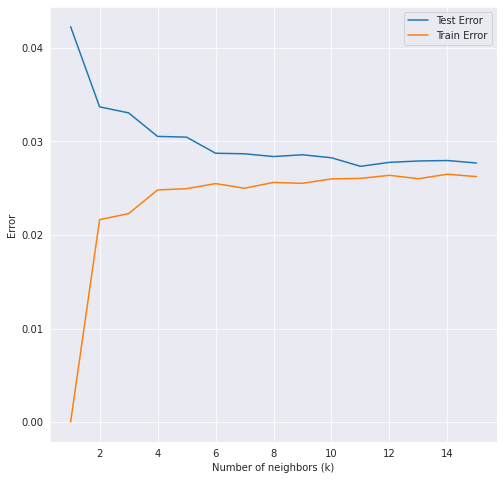

In [26]:
# Plot k vs training and testing error
plt.figure(figsize=(8,8))
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Error")
plt.plot(kl,vl, label = 'Test Error')
plt.plot(kl, v2, label = 'Train Error')
plt.legend()
plt.show()

**Observations**: 
- From this graph, we can see that k=15 gives us the best results for generalized training & testing error.